<a href="https://colab.research.google.com/github/bryaanabraham/Wandering_Guardian/blob/i/multiple_graphs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

df = pd.read_csv("go_track_trackspoints.csv")
df.head(10)


,id,latitude,longitude,track_id,time
0,1,-10.939341,-37.062742,1,2014-09-13 07:24:32
1,2,-10.939341,-37.062742,1,2014-09-13 07:24:37
2,3,-10.939324,-37.062765,1,2014-09-13 07:24:42
3,4,-10.939211,-37.062843,1,2014-09-13 07:24:47
4,5,-10.938939,-37.062879,1,2014-09-13 07:24:53
5,6,-10.938544,-37.062839,1,2014-09-13 07:24:59
6,7,-10.938346,-37.062588,1,2014-09-13 07:25:04
7,8,-10.938448,-37.062000,1,2014-09-13 07:25:10
8,9,-10.938666,-37.061499,1,2014-09-13 07:25:15
9,10,-10.938986,-37.060819,1,2014-09-13 07:25:21


In [3]:
df.dropna(how='all', inplace=True)
df = df[df['track_id'] == 1]
df.head(10)

,id,latitude,longitude,track_id,time
0,1,-10.939341,-37.062742,1,2014-09-13 07:24:32
1,2,-10.939341,-37.062742,1,2014-09-13 07:24:37
2,3,-10.939324,-37.062765,1,2014-09-13 07:24:42
3,4,-10.939211,-37.062843,1,2014-09-13 07:24:47
4,5,-10.938939,-37.062879,1,2014-09-13 07:24:53
5,6,-10.938544,-37.062839,1,2014-09-13 07:24:59
6,7,-10.938346,-37.062588,1,2014-09-13 07:25:04
7,8,-10.938448,-37.062000,1,2014-09-13 07:25:10
8,9,-10.938666,-37.061499,1,2014-09-13 07:25:15
9,10,-10.938986,-37.060819,1,2014-09-13 07:25:21


In [4]:
import math

def gps_to_cartesian(floatlatitude, longitude):
    # Radius of the Earth in meters
    R = 6371000

    # Convert latitude and longitude from degrees to radians
    lat_rad = math.radians(floatlatitude)
    lon_rad = math.radians(longitude)

    # Convert latitude and longitude to Cartesian coordinates
    x = R * math.cos(lat_rad) * math.cos(lon_rad)
    y = R * math.cos(lat_rad) * math.sin(lon_rad)

    return x, y

# Apply the gps_to_cartesian function to each row of the DataFrame
df['x'], df['y'] = zip(*df.apply(lambda row: gps_to_cartesian(row['latitude'], row['longitude']), axis=1))

# Display the modified DataFrame
df.head(10)


<ipython-input-4-1f3ce3ac5499>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['x'], df['y'] = zip(*df.apply(lambda row: gps_to_cartesian(row['latitude'], row['longitude']), axis=1))
<ipython-input-4-1f3ce3ac5499>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['x'], df['y'] = zip(*df.apply(lambda row: gps_to_cartesian(row['latitude'], row['longitude']), axis=1))


,id,latitude,longitude,track_id,time,x,y
0,1,-10.939341,-37.062742,1,2014-09-13 07:24:32,4.991524e+06,-3.769960e+06
1,2,-10.939341,-37.062742,1,2014-09-13 07:24:37,4.991524e+06,-3.769960e+06
2,3,-10.939324,-37.062765,1,2014-09-13 07:24:42,4.991523e+06,-3.769962e+06
3,4,-10.939211,-37.062843,1,2014-09-13 07:24:47,4.991519e+06,-3.769970e+06
4,5,-10.938939,-37.062879,1,2014-09-13 07:24:53,4.991521e+06,-3.769977e+06
5,6,-10.938544,-37.062839,1,2014-09-13 07:24:59,4.991531e+06,-3.769978e+06
6,7,-10.938346,-37.062588,1,2014-09-13 07:25:04,4.991551e+06,-3.769959e+06
7,8,-10.938448,-37.062000,1,2014-09-13 07:25:10,4.991588e+06,-3.769906e+06
8,9,-10.938666,-37.061499,1,2014-09-13 07:25:15,4.991617e+06,-3.769860e+06
9,10,-10.938986,-37.060819,1,2014-09-13 07:25:21,4.991656e+06,-3.769797e+06


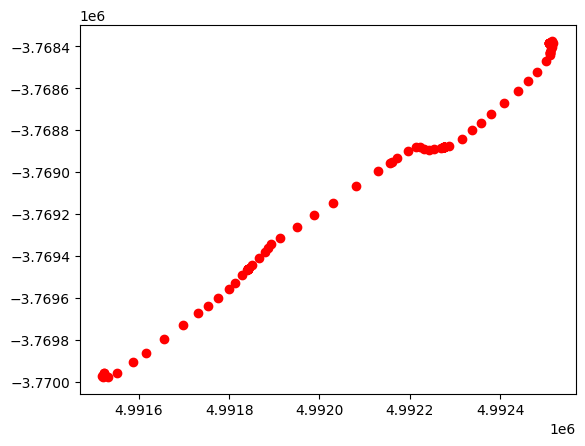

In [5]:
# gps to cartesian

import matplotlib.pyplot as plt
plt.scatter(df['x'], df['y'], label='GPS Data', color='red')


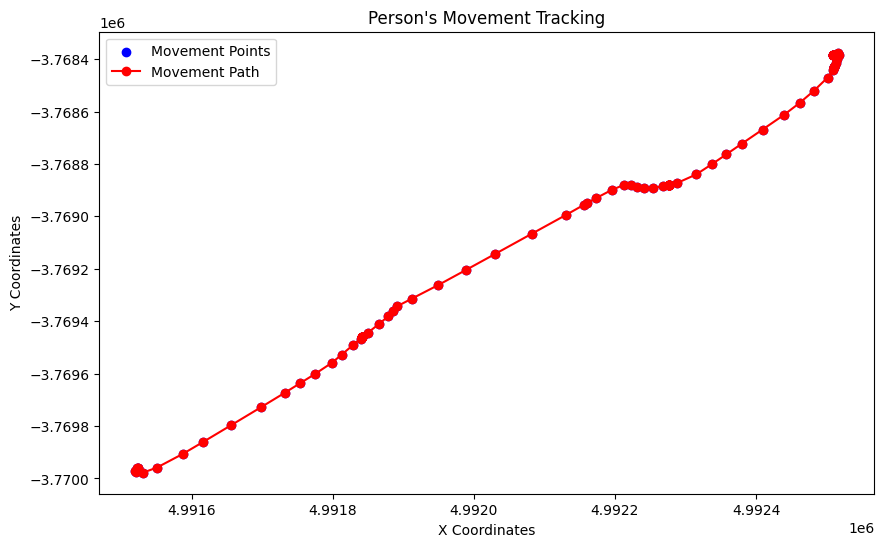

In [6]:
plt.figure(figsize=(10, 6))

# Plot the points
plt.scatter(df['x'], df['y'], label='Movement Points', color='blue')

# Connect the points with lines
plt.plot(df['x'], df['y'], linestyle='-', marker='o', color='red', label='Movement Path')

# Set labels and title
plt.xlabel('X Coordinates')
plt.ylabel('Y Coordinates')
plt.title('Person\'s Movement Tracking')

# Show legend
plt.legend()

# Show the plot
plt.show()

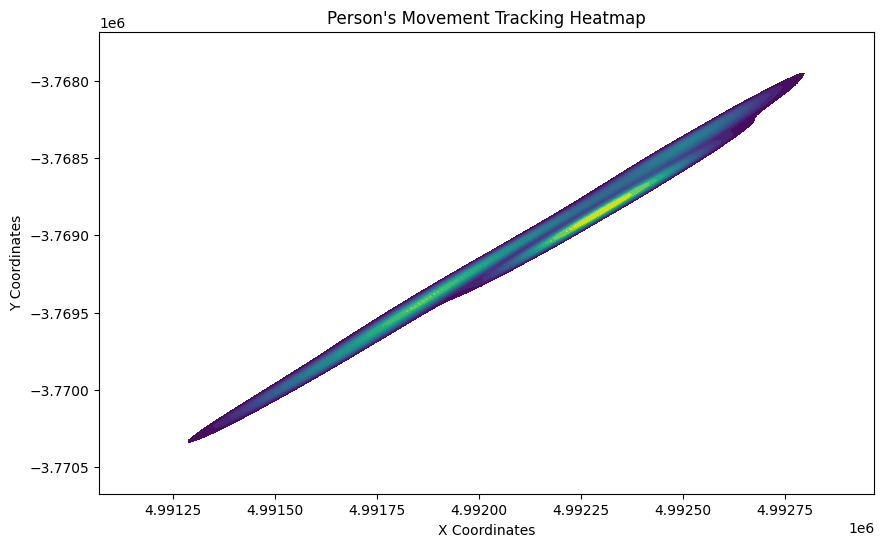

In [7]:
#cartesian coordinates, heatmap plotting

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='x', y='y', fill=True, cmap='viridis', levels=20)

# Set labels and title
plt.xlabel('X Coordinates')
plt.ylabel('Y Coordinates')
plt.title('Person\'s Movement Tracking Heatmap')

# Show the plot
plt.show()


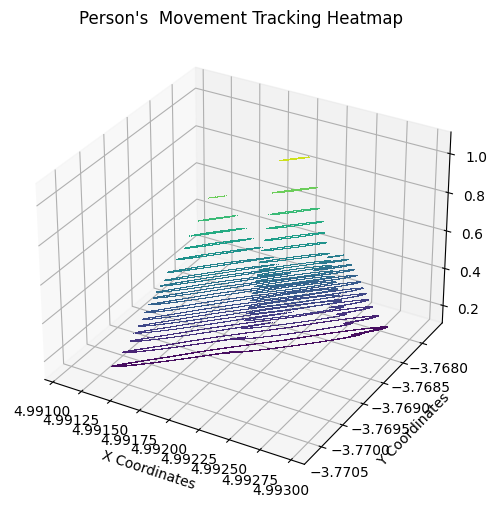

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a 3D heatmap using Seaborn
plt.figure(figsize=(10, 6))
ax = plt.axes(projection='3d')
sns.kdeplot(data=df, x='x', y='y', fill=True, cmap='viridis', levels=20, ax=ax)

# Set labels and title
ax.set_xlabel('X Coordinates')
ax.set_ylabel('Y Coordinates')
plt.title('Person\'s  Movement Tracking Heatmap')

# Show the plot
plt.show()



In [9]:
df.head(10)

,id,latitude,longitude,track_id,time,x,y
0,1,-10.939341,-37.062742,1,2014-09-13 07:24:32,4.991524e+06,-3.769960e+06
1,2,-10.939341,-37.062742,1,2014-09-13 07:24:37,4.991524e+06,-3.769960e+06
2,3,-10.939324,-37.062765,1,2014-09-13 07:24:42,4.991523e+06,-3.769962e+06
3,4,-10.939211,-37.062843,1,2014-09-13 07:24:47,4.991519e+06,-3.769970e+06
4,5,-10.938939,-37.062879,1,2014-09-13 07:24:53,4.991521e+06,-3.769977e+06
5,6,-10.938544,-37.062839,1,2014-09-13 07:24:59,4.991531e+06,-3.769978e+06
6,7,-10.938346,-37.062588,1,2014-09-13 07:25:04,4.991551e+06,-3.769959e+06
7,8,-10.938448,-37.062000,1,2014-09-13 07:25:10,4.991588e+06,-3.769906e+06
8,9,-10.938666,-37.061499,1,2014-09-13 07:25:15,4.991617e+06,-3.769860e+06
9,10,-10.938986,-37.060819,1,2014-09-13 07:25:21,4.991656e+06,-3.769797e+06


In [10]:
import math

def gps_to_cartesian(latitude, longitude):
    # Radius of the Earth in meters
    R = 6371000

    # Convert latitude and longitude from degrees to radians
    lat_rad = math.radians(latitude)
    lon_rad = math.radians(longitude)

    # Convert latitude and longitude to Cartesian coordinates
    x = R * math.cos(lat_rad) * math.cos(lon_rad)
    y = R * math.cos(lat_rad) * math.sin(lon_rad)
    z = R * math.sin(lat_rad)

    return x, y, z

# Apply the gps_to_cartesian function to each row of the DataFrame
df[['x', 'y', 'z']] = df.apply(lambda row: pd.Series(gps_to_cartesian(row['latitude'], row['longitude'])), axis=1)

# Display the modified DataFrame
df.head(10)


,id,latitude,longitude,track_id,time,x,y,z
0,1,-10.939341,-37.062742,1,2014-09-13 07:24:32,4.991524e+06,-3.769960e+06,-1.209022e+06
1,2,-10.939341,-37.062742,1,2014-09-13 07:24:37,4.991524e+06,-3.769960e+06,-1.209022e+06
2,3,-10.939324,-37.062765,1,2014-09-13 07:24:42,4.991523e+06,-3.769962e+06,-1.209021e+06
3,4,-10.939211,-37.062843,1,2014-09-13 07:24:47,4.991519e+06,-3.769970e+06,-1.209008e+06
4,5,-10.938939,-37.062879,1,2014-09-13 07:24:53,4.991521e+06,-3.769977e+06,-1.208978e+06
5,6,-10.938544,-37.062839,1,2014-09-13 07:24:59,4.991531e+06,-3.769978e+06,-1.208935e+06
6,7,-10.938346,-37.062588,1,2014-09-13 07:25:04,4.991551e+06,-3.769959e+06,-1.208914e+06
7,8,-10.938448,-37.062000,1,2014-09-13 07:25:10,4.991588e+06,-3.769906e+06,-1.208925e+06
8,9,-10.938666,-37.061499,1,2014-09-13 07:25:15,4.991617e+06,-3.769860e+06,-1.208949e+06
9,10,-10.938986,-37.060819,1,2014-09-13 07:25:21,4.991656e+06,-3.769797e+06,-1.208984e+06


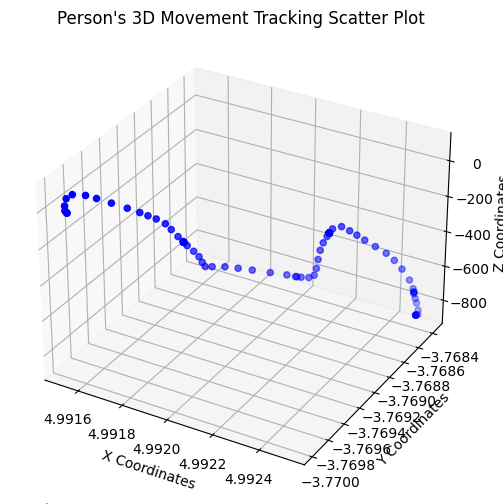

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assuming df is your DataFrame with the relevant coordinates and 'x', 'y', 'z' columns

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
ax.scatter(df['x'], df['y'], df['z'], c='blue', marker='o', label='Movement Points')

# Set labels and title
ax.set_xlabel('X Coordinates')
ax.set_ylabel('Y Coordinates')
ax.set_zlabel('Z Coordinates')
plt.title('Person\'s 3D Movement Tracking Scatter Plot')

# Show the plot
plt.show()


<ipython-input-12-9823c72e0df2>:15: DeprecationWarning: Please use `gaussian_kde` from the `scipy.stats` namespace, the `scipy.stats.kde` namespace is deprecated.
  k = kde.gaussian_kde([x, y])


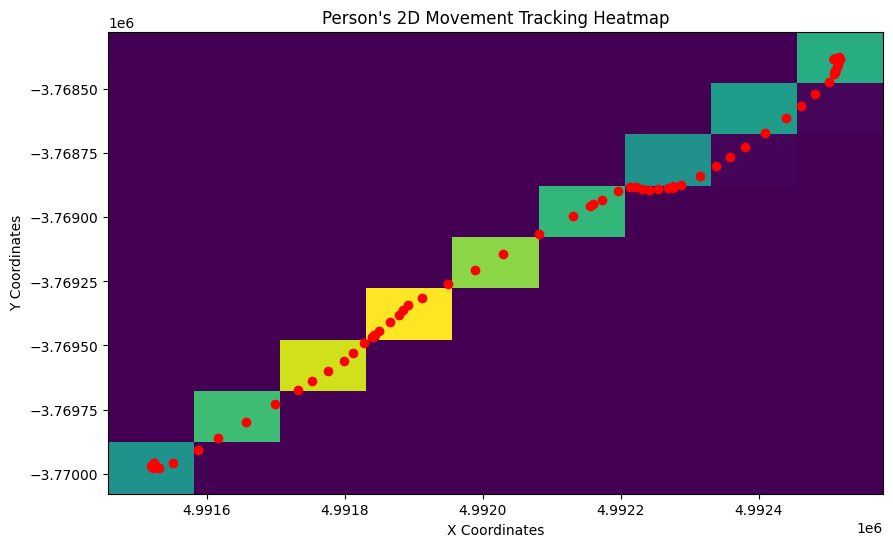

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import kde

# Assuming df is your DataFrame with the relevant coordinates and 'x', 'y', 'z' columns

# Create a 2D heatmap
fig, ax = plt.subplots(figsize=(10, 6))
x = df['x']
y = df['y']
z = df['z']

# Calculate the kernel density estimate
k = kde.gaussian_kde([x, y])
xi, yi = np.mgrid[x.min():x.max():x.size**0.5*1j, y.min():y.max():y.size**0.5*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))

# Plot the heatmap
ax.pcolormesh(xi, yi, zi.reshape(xi.shape), shading='auto', cmap='viridis')

# Scatter plot the points on top
ax.scatter(x, y, c='red', marker='o', label='Movement Points')

# Set labels and title
ax.set_xlabel('X Coordinates')
ax.set_ylabel('Y Coordinates')
plt.title('Person\'s 2D Movement Tracking Heatmap')

# Show the plot
plt.show()


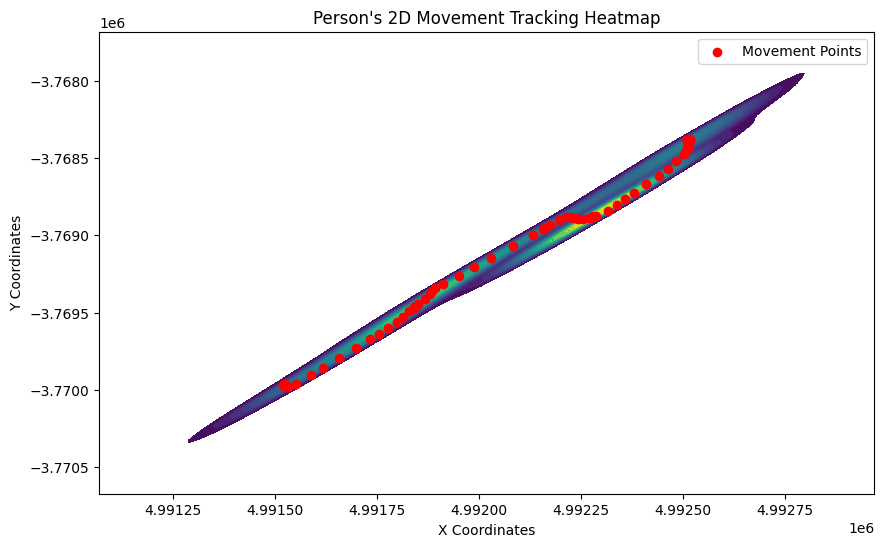

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with the relevant coordinates and 'x', 'y', 'z' columns

# Create a 2D heatmap using Seaborn
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='x', y='y', fill=True, cmap='viridis', levels=20)

# Scatter plot the points on top
plt.scatter(df['x'], df['y'], c='red', marker='o', label='Movement Points')

# Set labels and title
plt.xlabel('X Coordinates')
plt.ylabel('Y Coordinates')
plt.title('Person\'s 2D Movement Tracking Heatmap')

# Show the legend
plt.legend()

# Show the plot
plt.show()


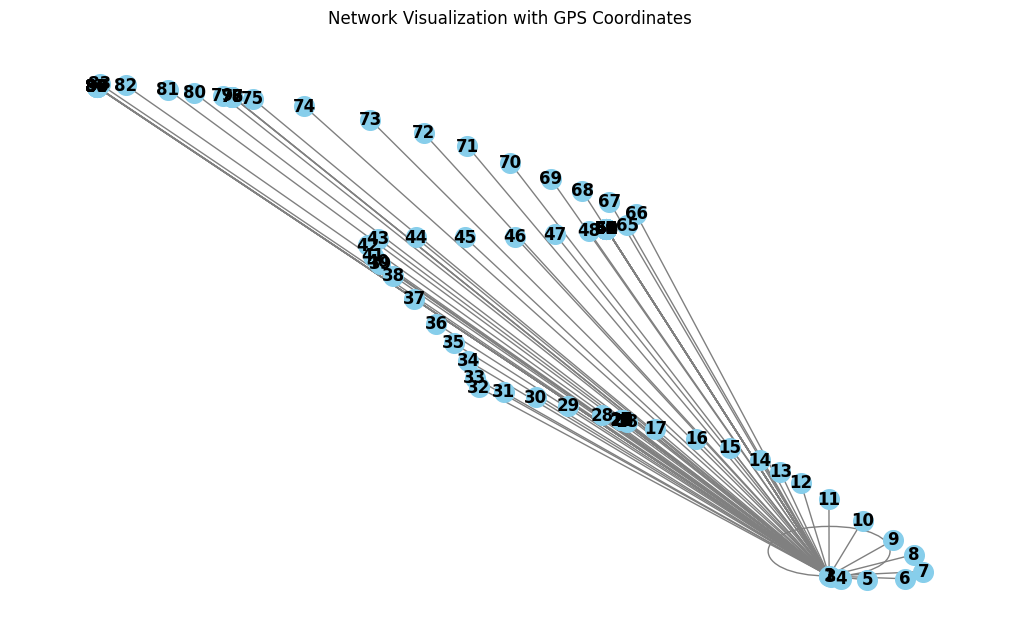

In [14]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with the relevant data
# Columns: 'latitude', 'longitude', 'node_id', 'connection_id'

# Create a graph using NetworkX
G = nx.Graph()

# Iterate through DataFrame rows to add nodes with GPS coordinates
for _, row in df.iterrows():
    node_id = row['id']
    latitude = row['latitude']
    longitude = row['longitude']
    G.add_node(node_id, pos=(latitude, longitude))  # 'pos' attribute for node positions

# Add edges based on connections in the DataFrame
G.add_edges_from(df[['id', 'track_id']].values)

# Draw the network graph with GPS coordinates
plt.figure(figsize=(10, 6))
pos = nx.get_node_attributes(G, 'pos')  # Retrieve node positions
nx.draw(G, pos, with_labels=True, font_weight='bold', node_size=200, node_color='skyblue', edge_color='gray')

# Set labels and title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Network Visualization with GPS Coordinates')

# Show the plot
plt.show()


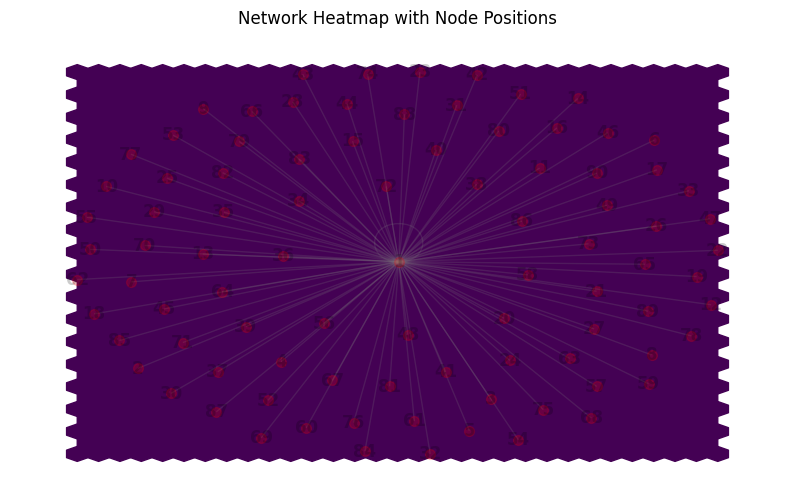

In [15]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Assuming df is your DataFrame with the relevant data
# Columns: 'latitude', 'longitude', 'node_id', 'connection_id'

# Create a graph using NetworkX
G = nx.Graph()

# Iterate through DataFrame rows to add nodes with GPS coordinates
for _, row in df.iterrows():
    node_id = row['track_id']
    latitude = row['latitude']
    longitude = row['longitude']
    G.add_node(node_id, pos=(latitude, longitude))  # 'pos' attribute for node positions

# Add edges based on connections in the DataFrame
G.add_edges_from(df[['track_id','id']].values)

# Calculate node positions using a layout algorithm (e.g., spring_layout)
pos = nx.spring_layout(G)

# Get node coordinates for plotting
node_coords = np.array(list(pos.values()))

# Plot the heatmap
plt.figure(figsize=(10, 6))
plt.hexbin(node_coords[:, 0], node_coords[:, 1], gridsize=30, cmap='viridis', bins='log')

# Draw the network graph on top
nx.draw(G, pos, with_labels=True, font_weight='bold', node_size=50, node_color='red', edge_color='gray', alpha=0.2)

# Set labels and title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Network Heatmap with Node Positions')

# Show the plot
plt.show()


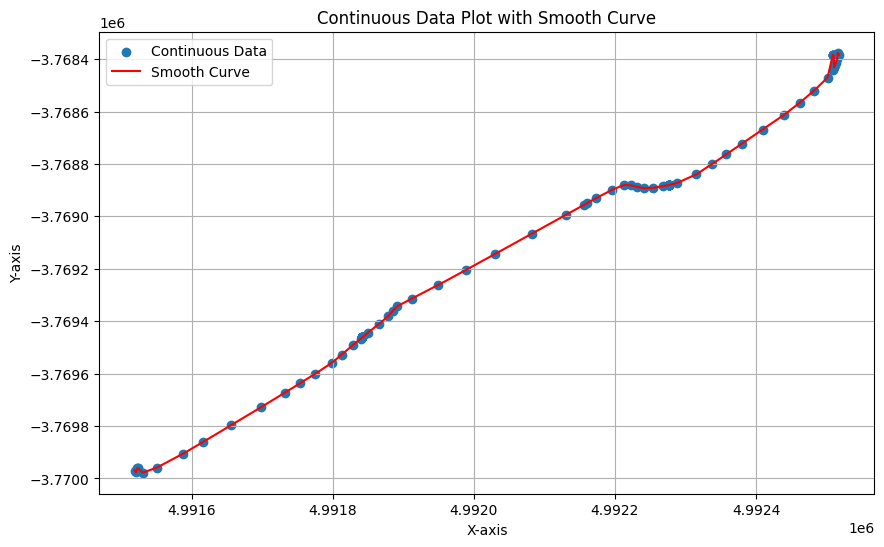

In [16]:
#smooth curve with continuous plot
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming df is your DataFrame with continuous data

# Sort the DataFrame by the x-axis (assuming x is the independent variable)
df = df.sort_values(by='x')

# Generate a denser x-axis for smooth curve
dense_x = np.linspace(df['x'].min(), df['x'].max(), 1000)

# Interpolate the y values for the denser x-axis
dense_y = np.interp(dense_x, df['x'], df['y'])

# Plot the scatter points and smooth curve
plt.figure(figsize=(10, 6))
plt.scatter(df['x'], df['y'], label='Continuous Data', marker='o')
plt.plot(dense_x, dense_y, label='Smooth Curve', color='red')
plt.title('Continuous Data Plot with Smooth Curve')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.grid(True)
plt.show()


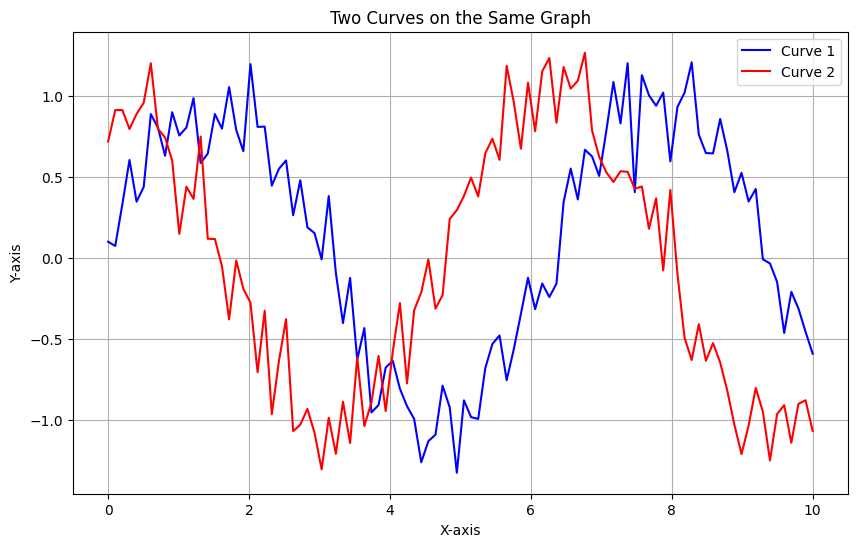

In [18]:
# to check whether two curves can be plotted?
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(42)  # Setting seed for reproducibility
x_values = np.linspace(0, 10, 100)
y1_values = np.sin(x_values) + np.random.normal(0, 0.2, size=len(x_values))
y2_values = np.cos(x_values) + np.random.normal(0, 0.2, size=len(x_values))

df = pd.DataFrame({'x': x_values, 'y1': y1_values, 'y2': y2_values})

df = df.sort_values(by='x')

plt.figure(figsize=(10, 6))
plt.plot(df['x'], df['y1'], label='Curve 1', color='blue')
plt.plot(df['x'], df['y2'], label='Curve 2', color='red')

plt.title('Two Curves on the Same Graph')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

plt.legend()

plt.grid(True)
plt.show()


<ipython-input-19-afd145f5deae>:24: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  distance, _ = quad(lambda x: np.abs(np.interp(x, df['x'], df['y1']) - np.interp(x, df['x'], df['y2'])), df['x'].min(), df['x'].max())


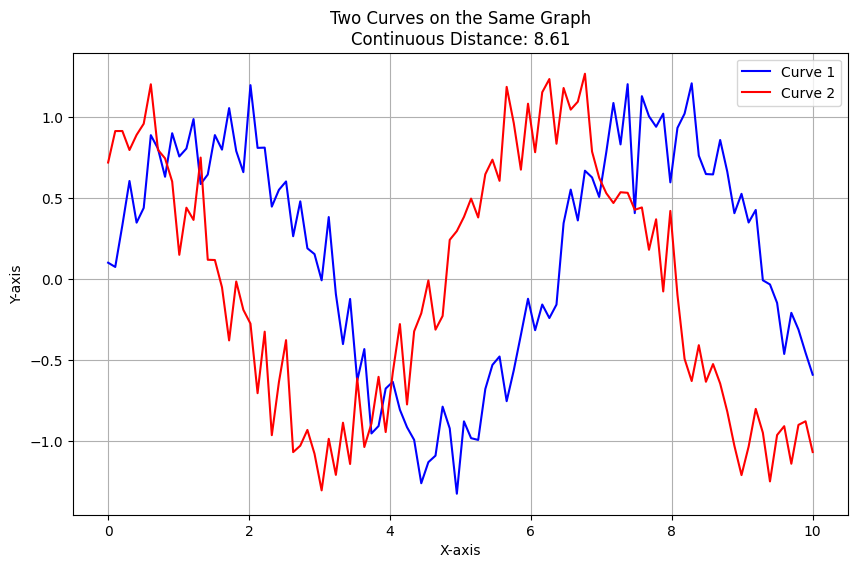

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

# Create dummy data
np.random.seed(42)
x_values = np.linspace(0, 10, 100)
y1_values = np.sin(x_values) + np.random.normal(0, 0.2, size=len(x_values))
y2_values = np.cos(x_values) + np.random.normal(0, 0.2, size=len(x_values))

# Create a DataFrame
df = pd.DataFrame({'x': x_values, 'y1': y1_values, 'y2': y2_values})

# Sort the DataFrame by the x-axis
df = df.sort_values(by='x')

# Plot both curves on the same graph
plt.figure(figsize=(10, 6))
plt.plot(df['x'], df['y1'], label='Curve 1', color='blue')
plt.plot(df['x'], df['y2'], label='Curve 2', color='red')

# Calculate the continuous distance (area between the curves)
distance, _ = quad(lambda x: np.abs(np.interp(x, df['x'], df['y1']) - np.interp(x, df['x'], df['y2'])), df['x'].min(), df['x'].max())

# Add labels and title
plt.title(f'Two Curves on the Same Graph\nContinuous Distance: {distance:.2f}')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

# Show legend
plt.legend()

# Display the plot
plt.grid(True)
plt.show()


<ipython-input-20-ce40e54d72b5>:24: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  distances = [quad(continuous_distance, df['x'].min(), point)[0] for point in interval_points]


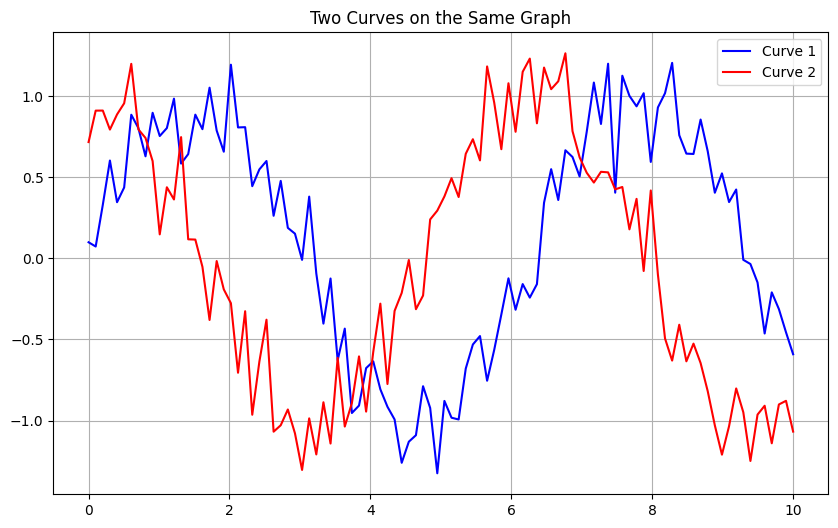

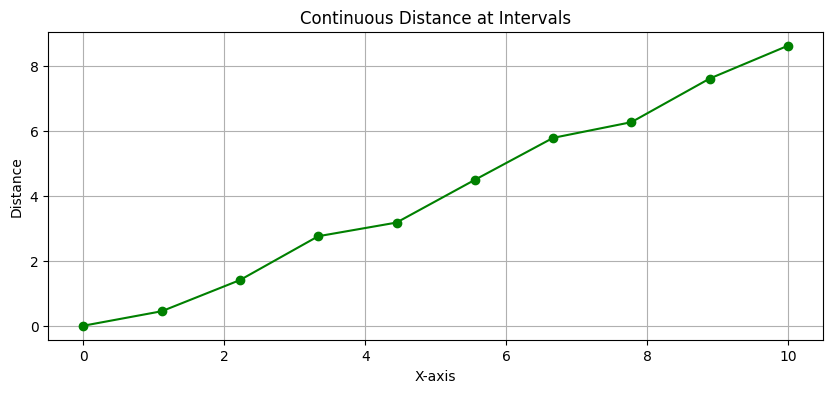

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

# Create dummy data
np.random.seed(42)
x_values = np.linspace(0, 10, 100)
y1_values = np.sin(x_values) + np.random.normal(0, 0.2, size=len(x_values))
y2_values = np.cos(x_values) + np.random.normal(0, 0.2, size=len(x_values))

# Create a DataFrame
df = pd.DataFrame({'x': x_values, 'y1': y1_values, 'y2': y2_values})

# Sort the DataFrame by the x-axis
df = df.sort_values(by='x')

# Function to calculate continuous distance between curves
def continuous_distance(x):
    return np.abs(np.interp(x, df['x'], df['y1']) - np.interp(x, df['x'], df['y2']))

# Calculate distances at intervals
interval_points = np.linspace(df['x'].min(), df['x'].max(), 10)
distances = [quad(continuous_distance, df['x'].min(), point)[0] for point in interval_points]

# Plot both curves on the same graph
plt.figure(figsize=(10, 6))
plt.plot(df['x'], df['y1'], label='Curve 1', color='blue')
plt.plot(df['x'], df['y2'], label='Curve 2', color='red')

# Add labels and title
plt.title('Two Curves on the Same Graph')

# Show legend
plt.legend()

# Display the main plot
plt.grid(True)
plt.show()

# Plot the distances at intervals
plt.figure(figsize=(10, 4))
plt.plot(interval_points, distances, marker='o', linestyle='-', color='green')
plt.title('Continuous Distance at Intervals')
plt.xlabel('X-axis')
plt.ylabel('Distance')
plt.grid(True)
plt.show()


<ipython-input-21-01f0605b4290>:24: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  distances = [quad(continuous_distance, df['x'].min(), point)[0] for point in interval_points]


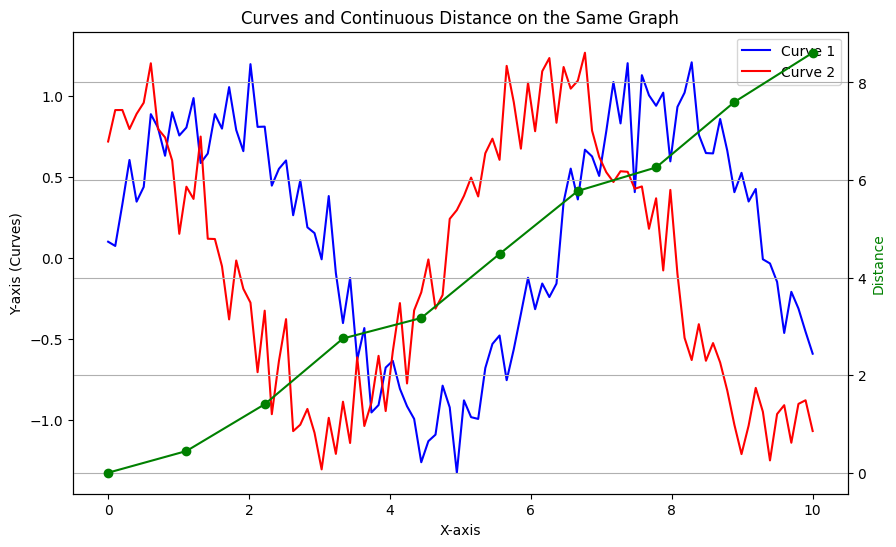

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

# Create dummy data
np.random.seed(42)
x_values = np.linspace(0, 10, 100)
y1_values = np.sin(x_values) + np.random.normal(0, 0.2, size=len(x_values))
y2_values = np.cos(x_values) + np.random.normal(0, 0.2, size=len(x_values))

# Create a DataFrame
df = pd.DataFrame({'x': x_values, 'y1': y1_values, 'y2': y2_values})

# Sort the DataFrame by the x-axis
df = df.sort_values(by='x')

# Function to calculate continuous distance between curves
def continuous_distance(x):
    return np.abs(np.interp(x, df['x'], df['y1']) - np.interp(x, df['x'], df['y2']))

# Calculate distances at intervals
interval_points = np.linspace(df['x'].min(), df['x'].max(), 10)
distances = [quad(continuous_distance, df['x'].min(), point)[0] for point in interval_points]

# Create a figure with shared x-axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot both curves on the primary y-axis
ax1.plot(df['x'], df['y1'], label='Curve 1', color='blue')
ax1.plot(df['x'], df['y2'], label='Curve 2', color='red')

# Set labels and title for the primary y-axis
ax1.set_xlabel('X-axis')
ax1.set_ylabel('Y-axis (Curves)', color='black')
ax1.legend()

# Create a secondary y-axis for continuous distance
ax2 = ax1.twinx()
ax2.plot(interval_points, distances, marker='o', linestyle='-', color='green')

# Set labels for the secondary y-axis
ax2.set_ylabel('Distance', color='green')

# Display the plot
plt.title('Curves and Continuous Distance on the Same Graph')
plt.grid(True)
plt.show()


<ipython-input-22-18e42651024c>:24: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  distances = [quad(continuous_distance, df['x'].min(), point)[0] for point in interval_points]


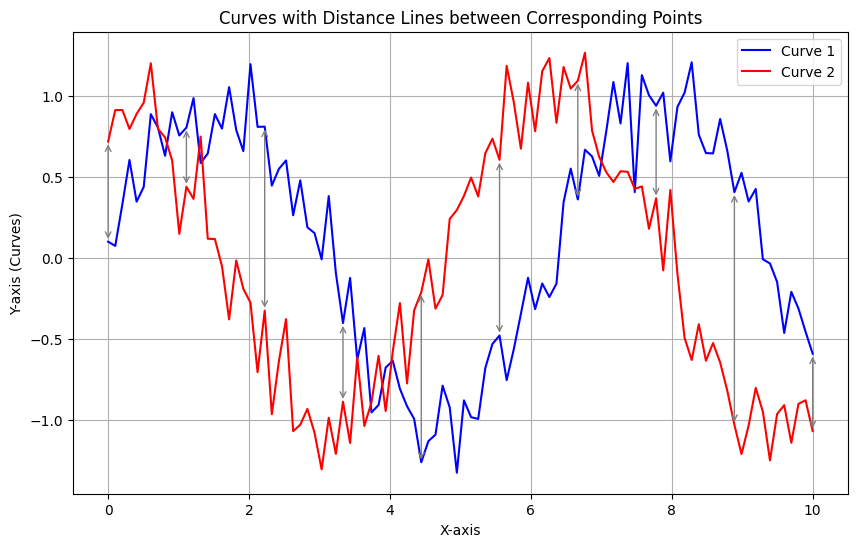

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

# Create dummy data
np.random.seed(42)
x_values = np.linspace(0, 10, 100)
y1_values = np.sin(x_values) + np.random.normal(0, 0.2, size=len(x_values))
y2_values = np.cos(x_values) + np.random.normal(0, 0.2, size=len(x_values))

# Create a DataFrame
df = pd.DataFrame({'x': x_values, 'y1': y1_values, 'y2': y2_values})

# Sort the DataFrame by the x-axis
df = df.sort_values(by='x')

# Function to calculate continuous distance between curves
def continuous_distance(x):
    return np.abs(np.interp(x, df['x'], df['y1']) - np.interp(x, df['x'], df['y2']))

# Calculate distances at intervals
interval_points = np.linspace(df['x'].min(), df['x'].max(), 10)
distances = [quad(continuous_distance, df['x'].min(), point)[0] for point in interval_points]

# Create a figure with shared x-axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot both curves on the primary y-axis
ax1.plot(df['x'], df['y1'], label='Curve 1', color='blue')
ax1.plot(df['x'], df['y2'], label='Curve 2', color='red')

# Set labels and title for the primary y-axis
ax1.set_xlabel('X-axis')
ax1.set_ylabel('Y-axis (Curves)', color='black')
ax1.legend()

# Plot lines connecting corresponding points
for point in interval_points:
    idx = np.abs(df['x'] - point).idxmin()
    ax1.annotate('', xy=(df.loc[idx, 'x'], df.loc[idx, 'y1']), xytext=(df.loc[idx, 'x'], df.loc[idx, 'y2']),
                 arrowprops=dict(arrowstyle='<->', color='gray'))

# Display the plot
plt.title('Curves with Distance Lines between Corresponding Points')
plt.grid(True)
plt.show()


<ipython-input-26-cda561de2dca>:24: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  distances = [quad(continuous_distance, df['x'].min(), point)[0] for point in interval_points]


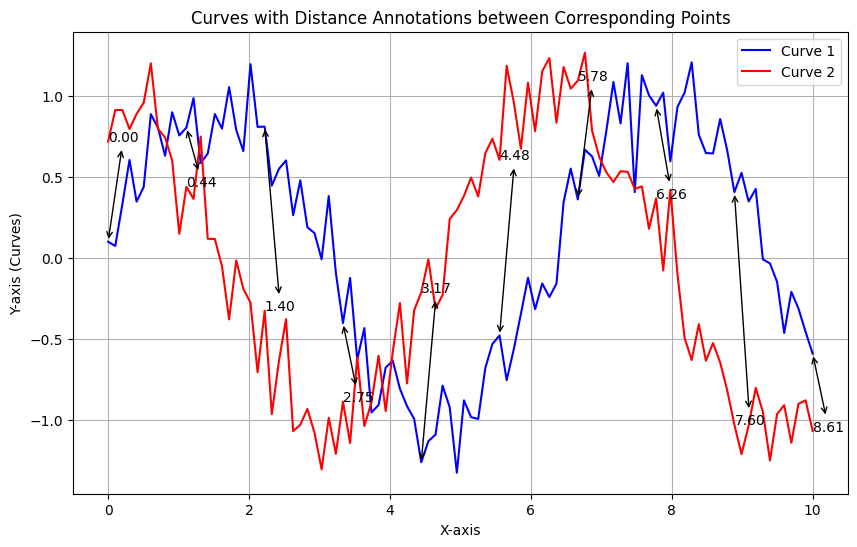

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

# Create dummy data
np.random.seed(42)
x_values = np.linspace(0, 10, 100)
y1_values = np.sin(x_values) + np.random.normal(0, 0.2, size=len(x_values))
y2_values = np.cos(x_values) + np.random.normal(0, 0.2, size=len(x_values))

# Create a DataFrame
df = pd.DataFrame({'x': x_values, 'y1': y1_values, 'y2': y2_values})

# Sort the DataFrame by the x-axis
df = df.sort_values(by='x')

# Function to calculate continuous distance between curves
def continuous_distance(x):
    return np.abs(np.interp(x, df['x'], df['y1']) - np.interp(x, df['x'], df['y2']))

# Calculate distances at intervals
interval_points = np.linspace(df['x'].min(), df['x'].max(), 10)
distances = [quad(continuous_distance, df['x'].min(), point)[0] for point in interval_points]

# Create a figure with shared x-axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot both curves on the primary y-axis
ax1.plot(df['x'], df['y1'], label='Curve 1', color='blue')
ax1.plot(df['x'], df['y2'], label='Curve 2', color='red')

# Set labels and title for the primary y-axis
ax1.set_xlabel('X-axis')
ax1.set_ylabel('Y-axis (Curves)', color='black')
ax1.legend()

# Plot lines connecting corresponding points with distance annotations
for point, distance in zip(interval_points, distances):
    idx = np.abs(df['x'] - point).idxmin()
    ax1.annotate(f'{distance:.2f}', xy=(df.loc[idx, 'x'], df.loc[idx, 'y1']),
                 xytext=(df.loc[idx, 'x'], df.loc[idx, 'y2']),
                 arrowprops=dict(arrowstyle='<->', color='black'))

# Display the plot
plt.title('Curves with Distance Annotations between Corresponding Points')
plt.grid(True)
plt.show()
